<a href="https://colab.research.google.com/github/kpawel98/Projek/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv ('winequality-white.csv', sep=';')

In [3]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
df.quality.value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
df.shape


(4898, 12)

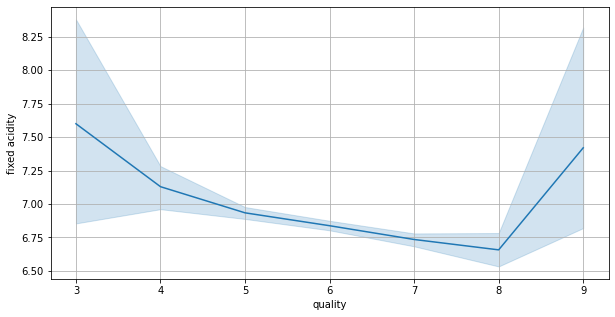

In [8]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='fixed acidity', data=df)
plt.grid()

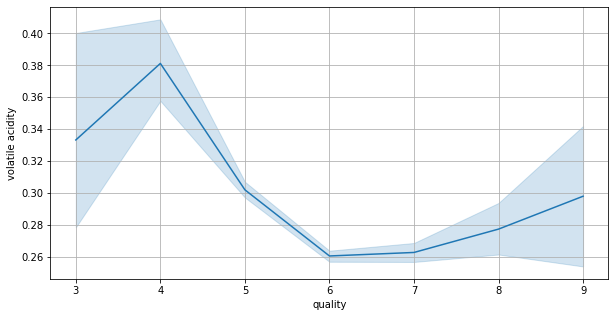

In [9]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='volatile acidity', data=df)
plt.grid()

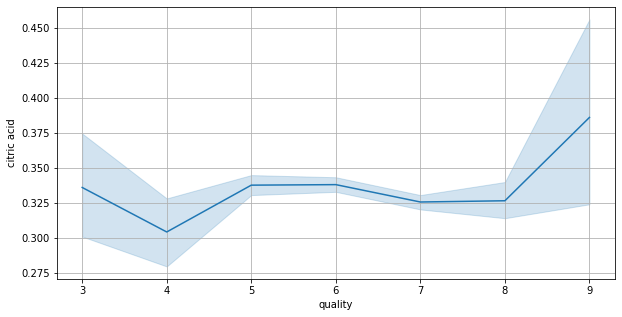

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='citric acid', data=df)
plt.grid()

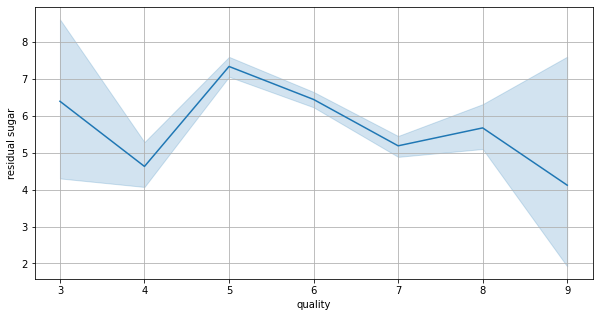

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='residual sugar', data=df)
plt.grid()

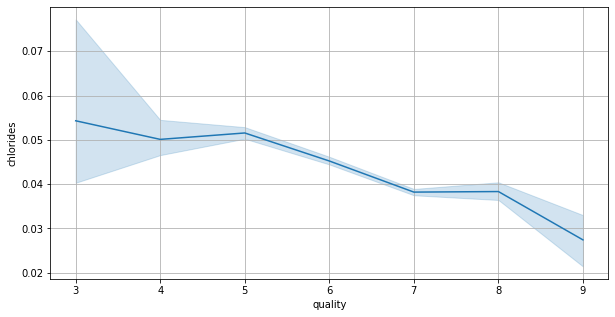

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='chlorides', data=df)
plt.grid()

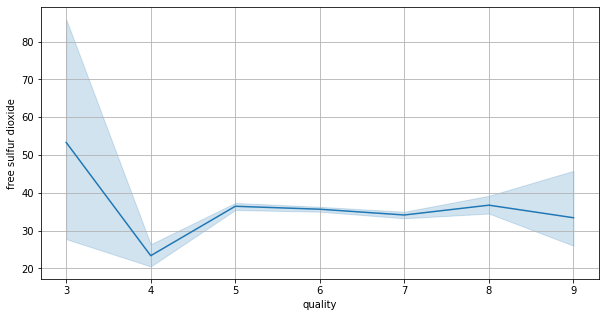

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='free sulfur dioxide', data=df)
plt.grid()

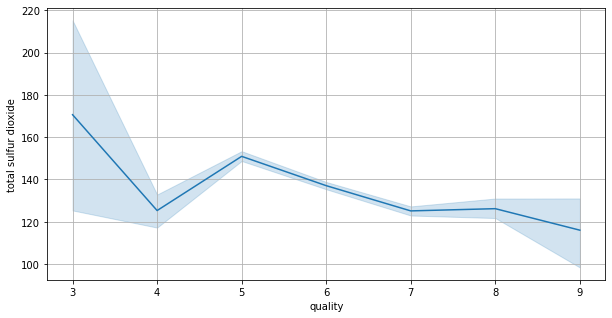

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='total sulfur dioxide', data=df)
plt.grid()

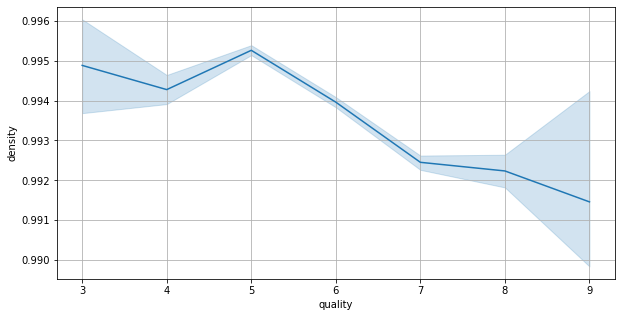

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='density', data=df)
plt.grid()

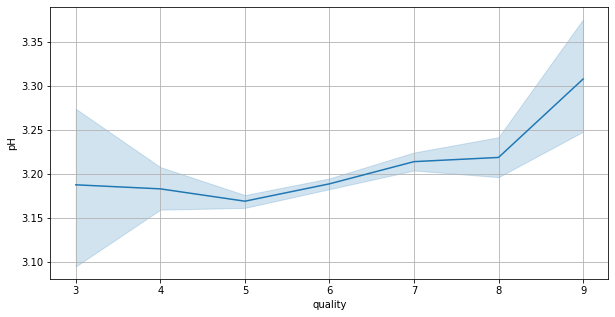

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='pH', data=df)
plt.grid()

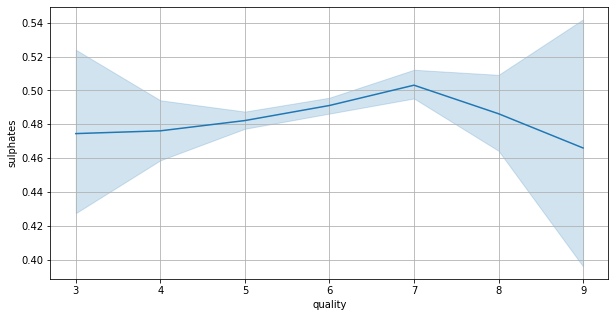

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='sulphates', data=df)
plt.grid()

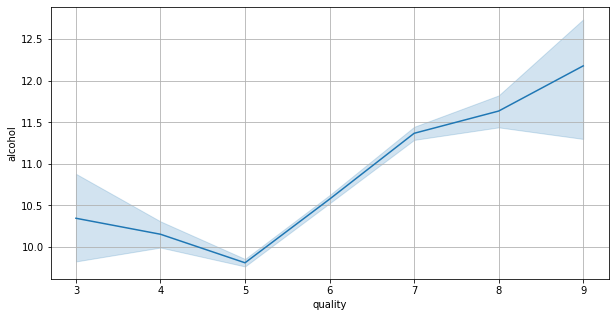

In [ ]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='alcohol', data=df)
plt.grid()

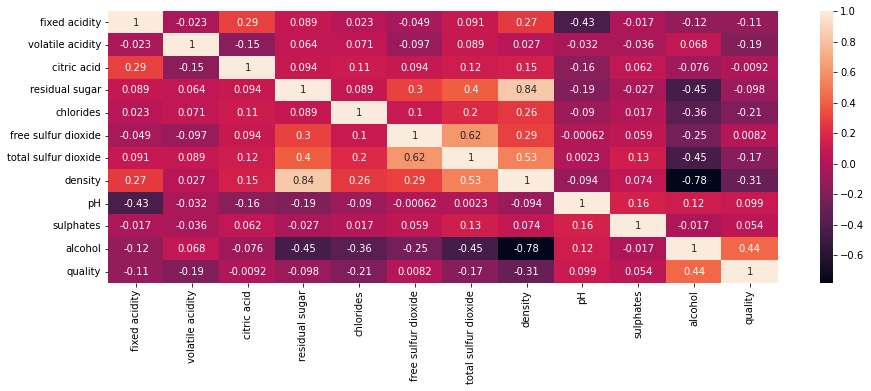

In [10]:
plt.figure(figsize = (15,5))
corr = df.corr()
sns.heatmap(corr,annot = True)

In [3]:
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [4]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [5]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [6]:
df['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [7]:
x = df.iloc[:,0:11]
y = df['quality']

In [8]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =42)

In [11]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [12]:
for name, score in zip(x.columns, rf.feature_importances_):
    print(name, score *100)

fixed acidity 6.838428445158708
volatile acidity 8.316922586799821
citric acid 7.297114173800281
residual sugar 8.76300670490813
chlorides 8.402179230977676
free sulfur dioxide 7.991945405734306
total sulfur dioxide 7.984556271693894
density 13.567005178680306
pH 8.667408117322449
sulphates 7.642643071062957
alcohol 14.52879081386146


In [13]:
models = pd.DataFrame({
    'Features' : x.columns,
    'Importance' : rf.feature_importances_ *100})

models.sort_values(by = 'Importance', ascending = False)

,Features,Importance
10,alcohol,14.528791
7,density,13.567005
3,residual sugar,8.763007
8,pH,8.667408
4,chlorides,8.402179
1,volatile acidity,8.316923
5,free sulfur dioxide,7.991945
6,total sulfur dioxide,7.984556
9,sulphates,7.642643
2,citric acid,7.297114


In [15]:
df.drop(columns = ['fixed acidity','citric acid','sulphates','total sulfur dioxide','free sulfur dioxide'], inplace = True)

In [16]:
x = df.drop(columns = 'quality')
y = df['quality']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.0817699   2.82134917 -0.035355    2.33151201 -1.24692128 -1.39315246]
 [ 0.21589563 -0.94476527  0.14774708 -0.00915417  0.74002864 -0.82427568]
 [ 0.01745194  0.10028219  0.1935226   0.3586648   0.47510198 -0.33666701]
 ...
 [-0.37943543 -1.02363678 -0.21845708 -0.49735026 -1.31315295 -0.90554379]
 [ 0.11667379 -1.04335466 -1.08819196 -1.78471666  1.0049553   1.85757201]
 [-0.67710097 -1.10250829 -1.179743   -1.54396243  0.47510198  1.04489089]]


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =42)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3428, 6)
(3428,)
(1470, 6)
(1470,)


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [21]:
lr_acc = accuracy_score(y_test, lr.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, lr.predict(x_train)), 4)*100} %")
print(f"Accuracy Score of Test Data is {round(lr_acc, 4)*100} %\n")

Accuracy Score of Training Data is 79.96 %
Accuracy Score of Test Data is 79.12 %



In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
knn_acc = accuracy_score(y_test, knn.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, knn.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(knn_acc, 4)*100} %\n")

Accuracy Score of Training Data is 86.64 %
Accuracy Score of Test Data is 81.84 %



In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, dtc.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(dtc_acc, 4)*100} %\n")

Accuracy Score of Training Data is 100.0 %
Accuracy Score of Test Data is 81.22 %



In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [27]:
nb_acc = accuracy_score(y_test, nb.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, nb.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(nb_acc, 4)*100} %\n")

Accuracy Score of Training Data is 75.14999999999999 %
Accuracy Score of Test Data is 74.00999999999999 %



In [28]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
rf_acc = accuracy_score(y_test, rf.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, rf.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(rf_acc, 4)*100} %\n")

Accuracy Score of Training Data is 100.0 %
Accuracy Score of Test Data is 87.76 %



In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [31]:
svc_acc = accuracy_score(y_test, svc.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, svc.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(svc_acc, 4)*100} %\n")

Accuracy Score of Training Data is 81.47999999999999 %
Accuracy Score of Test Data is 80.54 %



In [32]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN','Decision Tree', 'NaiveBayes', 'RandomForest', 'SVC'],
    'Procent' : [round(lr_acc, 4)*100, round(knn_acc, 4)*100, round(dtc_acc, 4)*100, round(nb_acc, 4)*100, round(rf_acc, 4)*100, round(svc_acc, 4)*100]
})


models.sort_values(by = 'Procent', ascending = False)

,Model,Procent
4,RandomForest,87.76
1,KNN,81.84
2,Decision Tree,81.22
5,SVC,80.54
0,Logistic Regression,79.12
3,NaiveBayes,74.01


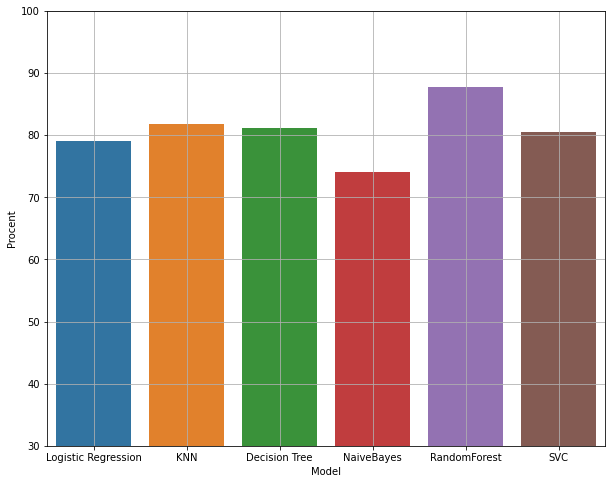

In [33]:
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Model', y = 'Procent', data = models)
plt.ylim(30, 100)
plt.grid()
plt.show()